In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [77]:
# Import data sets into python libraries
train_df = pd.read_csv('A:\\ML_Projects\\ML_Project_02\\Model_Building\\train.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [78]:
test_df = pd.read_csv('A:\\ML_Projects\\ML_Project_02\\Model_Building\\test_data.csv')
test_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,685,0,0.5,0,2,0,29,0.8,93,7,...,433,648,728,14,8,4,0,0,1,0
1,589,1,0.5,0,1,1,59,0.7,146,8,...,759,1858,362,16,10,6,1,1,1,0
2,1992,1,0.6,1,11,0,2,0.1,141,1,...,649,895,3206,10,9,10,1,1,0,3
3,1948,0,2.8,1,5,1,18,0.2,135,2,...,477,571,816,16,2,3,1,0,0,0
4,1986,0,0.5,0,7,0,51,0.4,95,3,...,342,774,3165,5,0,13,1,0,0,3


In [79]:
val_df = pd.read_csv('A:\\ML_Projects\\ML_Project_02\\Model_Building\\val_data.csv')
val_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1284,1,2.8,1,0,0,10,0.9,155,2,...,160,516,2197,16,2,9,0,1,1,1
1,904,1,1.2,1,10,1,31,0.8,112,3,...,657,1014,2814,13,3,19,1,0,0,2
2,1218,0,1.8,1,1,1,14,0.5,147,3,...,229,616,398,17,0,5,1,0,0,0
3,1546,1,0.5,1,3,1,6,0.2,101,1,...,91,1317,3521,15,11,9,1,0,0,3
4,1946,0,2.7,1,8,0,8,0.3,123,8,...,647,1849,3117,6,0,2,1,0,0,3


In [80]:
# Divide the dependant & independent variables
X_train=train_df.iloc[:,:20]
Y_train=train_df.iloc[:,20]

In [81]:
X_train.shape

(2000, 20)

In [82]:
Y_train.shape

(2000,)

In [83]:
X_test=test_df.iloc[:,:20]
Y_test=test_df.iloc[:,20]

In [84]:
X_test.shape

(396, 20)

In [85]:
Y_test.shape

(396,)

In [86]:
X_val=val_df.iloc[:,:20]
Y_val=val_df.iloc[:,20]

In [87]:
X_val.shape

(396, 20)

In [88]:
Y_val.shape

(396,)

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
# Fit the model
model_one = LogisticRegression()

In [90]:
model_one.fit(X_train,Y_train)

a:\ML_Projects\ML_Project_02\mob_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
model_one.coef_

array([[-7.65978641e-04,  3.32179493e-04,  1.11748510e-03,
         3.60661040e-04,  1.75674756e-03,  3.36410343e-04,
         1.66880110e-02,  2.46951173e-04,  5.06710953e-02,
         3.52826797e-03,  5.45204273e-03, -1.98760310e-03,
         1.10865276e-03, -4.55062671e-03,  8.54814754e-03,
         4.14026381e-03,  5.75939874e-03,  4.54326363e-04,
         3.96413576e-04,  3.54383430e-04],
       [ 1.11509073e-04,  1.12943983e-04,  9.80192486e-05,
         1.64339654e-04,  1.14882771e-03,  1.24900927e-04,
         7.05116720e-03,  1.86030874e-04,  1.28759835e-02,
        -3.18858585e-04,  1.90538913e-03, -2.17745110e-04,
         4.32260250e-04, -6.66867699e-04,  2.02105163e-03,
         1.42514367e-04,  3.66613320e-03,  1.19370111e-04,
         1.76860365e-04,  8.63027214e-05],
       [ 3.10177709e-04, -8.13340626e-05, -1.00784788e-04,
        -1.44871896e-04,  2.69503594e-04, -2.23681152e-04,
        -8.58080314e-03, -1.06553684e-04, -1.76315243e-02,
         4.22541397e-04, -1.1

In [92]:
model_one.intercept_

array([ 0.00065906,  0.00018887, -0.00010467, -0.00074327])

In [93]:
#Predict the values using validation set
y_pred = model_one.predict(X_val)
y_pred

array([2, 3, 0, 3, 3, 2, 2, 2, 1, 2, 0, 2, 0, 3, 3, 2, 3, 3, 3, 1, 0, 2,
       1, 0, 1, 1, 1, 0, 3, 2, 3, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 0, 0, 0,
       0, 0, 3, 2, 2, 3, 3, 3, 1, 0, 2, 3, 3, 0, 3, 3, 0, 1, 1, 0, 2, 0,
       0, 3, 1, 3, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 3, 1, 3, 3,
       3, 0, 2, 1, 3, 1, 3, 0, 3, 2, 1, 0, 3, 0, 3, 3, 3, 3, 2, 3, 0, 0,
       2, 2, 2, 0, 3, 0, 2, 0, 1, 2, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 0,
       1, 2, 3, 3, 2, 0, 3, 1, 1, 3, 0, 3, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 3, 2, 3, 1, 0, 1, 2, 0, 1, 3, 1, 1, 2, 3, 2,
       3, 1, 0, 3, 3, 0, 2, 3, 1, 1, 0, 2, 3, 2, 3, 2, 2, 3, 0, 1, 2, 0,
       2, 0, 3, 0, 0, 3, 2, 3, 0, 3, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 3,
       0, 2, 0, 0, 2, 3, 0, 3, 2, 0, 3, 3, 0, 0, 3, 2, 1, 0, 2, 2, 1, 3,
       1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 0, 3, 1, 3, 2, 3, 3, 3, 1, 0, 3, 1,
       2, 0, 3, 0, 1, 0, 1, 3, 0, 0, 3, 2, 3, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 3, 0, 1, 0, 1, 1, 0, 3, 1, 3, 0,

In [94]:
y_pred_prob = model_one.predict_proba(X_val)
y_pred_prob

array([[1.13313162e-02, 3.55502558e-01, 5.02637609e-01, 1.30528517e-01],
       [1.15921434e-05, 2.03667455e-02, 3.21937917e-01, 6.57683746e-01],
       [9.61525944e-01, 3.77142787e-02, 7.45416388e-04, 1.43605950e-05],
       ...,
       [3.07233167e-03, 2.97533403e-01, 5.34097263e-01, 1.65297002e-01],
       [5.17143003e-01, 4.25150620e-01, 5.39280977e-02, 3.77827877e-03],
       [9.73661202e-01, 2.62325944e-02, 1.05531617e-04, 6.72117927e-07]],
      shape=(396, 4))

In [95]:
formatted_prob = np.round(y_pred_prob, 2)
formatted_prob

array([[0.01, 0.36, 0.5 , 0.13],
       [0.  , 0.02, 0.32, 0.66],
       [0.96, 0.04, 0.  , 0.  ],
       ...,
       [0.  , 0.3 , 0.53, 0.17],
       [0.52, 0.43, 0.05, 0.  ],
       [0.97, 0.03, 0.  , 0.  ]], shape=(396, 4))

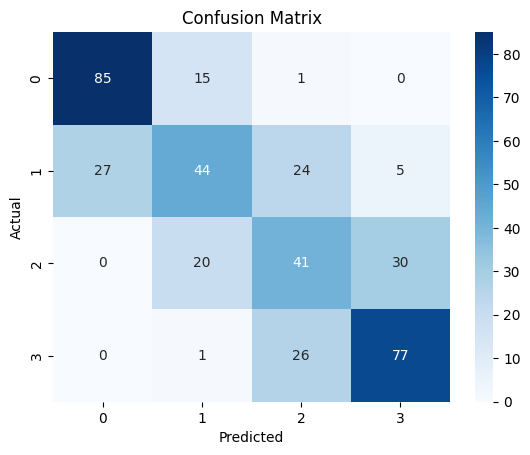

In [96]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [97]:
Accuracy = accuracy_score(Y_val,y_pred)
Accuracy

0.6237373737373737

In [98]:
# Classification repor
print(classification_report(Y_val,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       101
           1       0.55      0.44      0.49       100
           2       0.45      0.45      0.45        91
           3       0.69      0.74      0.71       104

    accuracy                           0.62       396
   macro avg       0.61      0.62      0.61       396
weighted avg       0.62      0.62      0.62       396



K Nearest Neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
# Find best parameters for K fold
K=np.arange(1,21)
K

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [101]:
MCE = []
for k in K:
    model_two = KNeighborsClassifier(n_neighbors=k)
    model_two.fit(X_train, Y_train)
    YP = model_two.predict(X_val)
    MCE.append(1 - accuracy_score(Y_val, YP))

print(MCE)

[0.0, 0.04040404040404044, 0.03535353535353536, 0.04797979797979801, 0.04292929292929293, 0.04292929292929293, 0.04292929292929293, 0.0505050505050505, 0.04797979797979801, 0.05303030303030298, 0.05555555555555558, 0.04797979797979801, 0.04797979797979801, 0.04292929292929293, 0.04292929292929293, 0.04797979797979801, 0.0505050505050505, 0.04797979797979801, 0.0505050505050505, 0.05303030303030298]


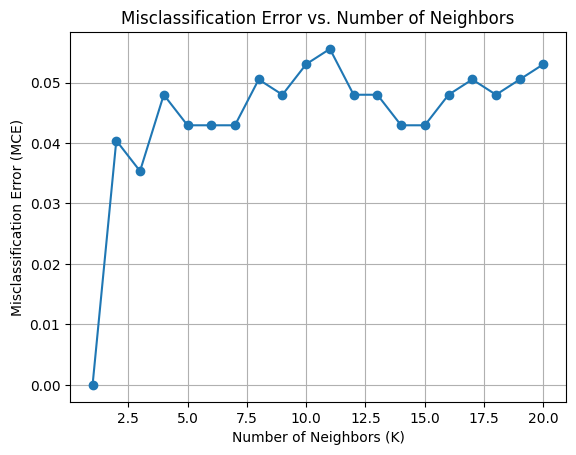

In [102]:
plt.plot(K, MCE, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Misclassification Error (MCE)')
plt.title('Misclassification Error vs. Number of Neighbors')
plt.grid(True)
plt.show()

In [103]:
knn=KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,Y_train)
y_pred_two = knn.predict(X_val)
accuracy_score =(Y_val,y_pred_two)
print(accuracy_score )

(0      1
1      2
2      0
3      3
4      3
      ..
391    1
392    3
393    2
394    0
395    0
Name: price_range, Length: 396, dtype: int64, array([1, 2, 0, 3, 3, 2, 1, 2, 2, 2, 0, 2, 0, 2, 3, 1, 2, 3, 3, 1, 1, 2,
       0, 0, 1, 1, 1, 0, 3, 3, 2, 1, 1, 2, 1, 2, 3, 3, 0, 3, 2, 0, 1, 0,
       1, 0, 3, 2, 2, 3, 1, 2, 1, 0, 2, 3, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1,
       0, 3, 1, 2, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 3, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 3, 3, 1, 0, 3, 0, 2, 3, 3, 3, 3, 3, 1, 0,
       3, 2, 2, 0, 2, 1, 2, 0, 1, 3, 1, 2, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 1, 2, 3, 2, 0, 3, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0, 1, 3, 1, 1, 0,
       0, 2, 3, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 3, 2, 0, 1, 2, 1,
       3, 1, 0, 3, 3, 0, 3, 2, 2, 3, 0, 2, 3, 1, 3, 1, 3, 3, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 3, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 3, 1, 3,
       1, 2, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 0, 1, 2, 3, 2, 1, 3, 2, 1, 2,
       0, 1, 0, 0, 3, 3, 3, 1, 2, 3, 0, 3, 1, 2, 3,

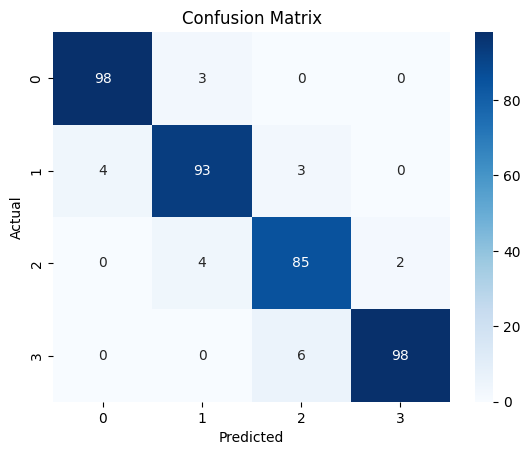

In [104]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_two), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [105]:
# Classification repor
print(classification_report(Y_val,y_pred_two))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       101
           1       0.93      0.93      0.93       100
           2       0.90      0.93      0.92        91
           3       0.98      0.94      0.96       104

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.95      0.94      0.94       396



Gaussian Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
model_three = GaussianNB()
model_three.fit(X_train, Y_train)

GaussianNB()

In [107]:
from sklearn.metrics import accuracy_score

# Predict on the validation set
y_pred_three = model_three.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_three)
print(accuracy)

0.8005050505050505


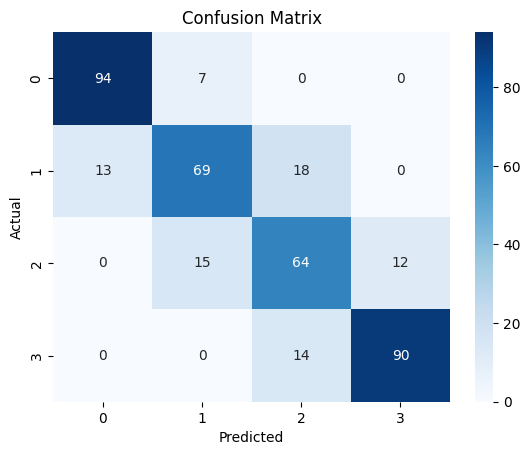

In [108]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_three), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [109]:
# Classification repor
print(classification_report(Y_val,y_pred_three))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       101
           1       0.76      0.69      0.72       100
           2       0.67      0.70      0.68        91
           3       0.88      0.87      0.87       104

    accuracy                           0.80       396
   macro avg       0.80      0.80      0.80       396
weighted avg       0.80      0.80      0.80       396



Support Vector Machine

In [110]:
from sklearn.svm import SVC

# Define the parameter grid to test different kernels and C values
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  
    'C': [0.1, 1, 10, 100],             
    'degree': [2, 3, 4],                 
    'gamma': ['scale', 'auto']          
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [111]:
from sklearn.svm import SVC 

In [112]:
model_four = SVC(kernel='linear', C=0.1)
model_four.fit(X_train, Y_train)

SVC(C=0.1, kernel='linear')

In [113]:
# Predict on the validation set
y_pred_four = model_four.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_four)
print(accuracy)

0.9873737373737373


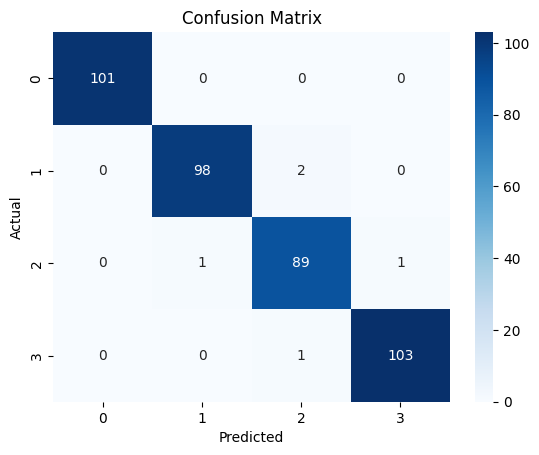

In [114]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_four), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [115]:
# Classification repor
print(classification_report(Y_val,y_pred_four))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       0.99      0.98      0.98       100
           2       0.97      0.98      0.97        91
           3       0.99      0.99      0.99       104

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396



Desicion Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model_five = DecisionTreeClassifier()
params_two = {
    'max_depth': [None, 10, 100],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}
gsearch_two = GridSearchCV(estimator=model_five, param_grid=params_two, cv=5, n_jobs=-1, verbose=2)
result_two = gsearch_two.fit(X_train, Y_train)
print("Best Parameters:", result_two.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [118]:
model_five = DecisionTreeClassifier(criterion ='entropy',max_depth =10,min_samples_split = 10,min_samples_leaf =4)
model_five.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

In [119]:
# Predict on the validation set
y_pred_five = model_five.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_five)
print(accuracy)

0.9621212121212122


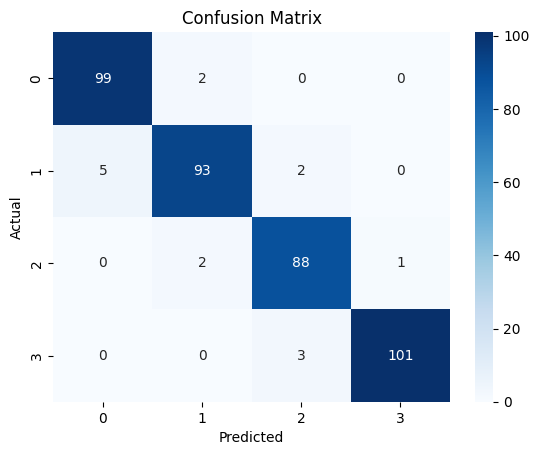

In [120]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_five), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [121]:
# Classification repor
print(classification_report(Y_val,y_pred_five))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       101
           1       0.96      0.93      0.94       100
           2       0.95      0.97      0.96        91
           3       0.99      0.97      0.98       104

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396



Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
params_three = {'n_estimators':[10,100],
                'criterion':["gini","entropy"]}
model_six = RandomForestClassifier()
cval_three = KFold(n_splits =10)

In [124]:
gsearch_three = GridSearchCV(model_six,params_three,cv=cval_three)
result_three = gsearch_three.fit(X_train,Y_train)
result_three.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [125]:
model_six = RandomForestClassifier(n_estimators = 100 ,
                                   criterion = 'entropy')
model_six.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [126]:
# Predict on the validation set
y_pred_six = model_six.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_six)
print(accuracy)

1.0


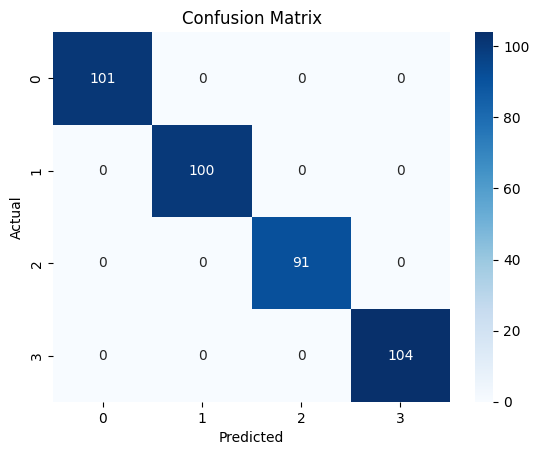

In [127]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_six), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [128]:
# Classification repor
print(classification_report(Y_val,y_pred_six))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



Extra Tree

In [129]:
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
params_four = {'n_estimators':[10,100],'criterion':["gini","entropy"]}
model_seven = ExtraTreesClassifier()
cval_four = KFold(n_splits =10)

In [131]:
gsearch_four = GridSearchCV(model_seven,params_four,cv=cval_four)
result_four = gsearch_four.fit(X_train,Y_train)
result_four.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [132]:
model_seven = ExtraTreesClassifier(n_estimators = 100 , criterion = 'entropy')
model_seven.fit(X_train,Y_train)

ExtraTreesClassifier(criterion='entropy')

In [133]:
# Predict on the validation set
y_pred_seven = model_seven.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_seven)
print(accuracy)

1.0


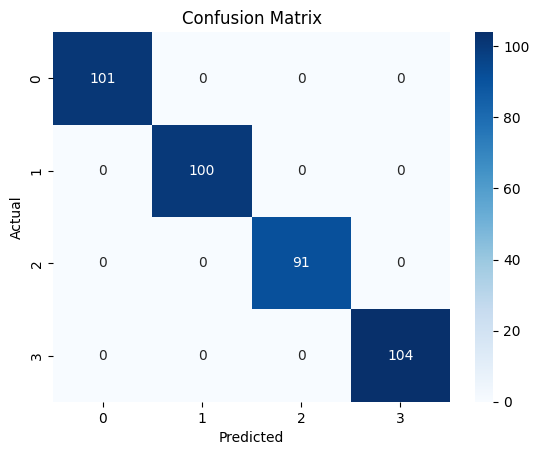

In [134]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_seven), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [135]:
# Classification repor
print(classification_report(Y_val,y_pred_seven))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



XG Boost

In [136]:
!pip install xgboost --timeout 120

In [137]:
from xgboost import XGBClassifier

In [138]:
model_eight = XGBClassifier()
model_eight.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [139]:
# Predict on the validation set
y_pred_eight = model_eight.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred_eight)
print(accuracy)

1.0


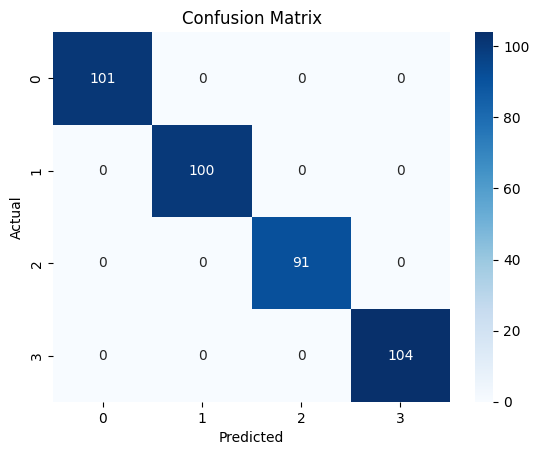

In [140]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_val,y_pred_eight), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [141]:
# Classification repor
print(classification_report(Y_val,y_pred_eight))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



Evaluate the best model

In [142]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models(models, X_train, Y_train, X_val, Y_val):
    
    # Dictionary to store the results for each model
    results = {}

    # Iterate over each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, Y_train)
        
        # Make predictions
        Y_pred = model.predict(X_val)
        
        # Compute classification metrics
        accuracy = accuracy_score(Y_val, Y_pred)
        f1 = f1_score(Y_val, Y_pred, average='weighted')  
        class_report = classification_report(Y_val, Y_pred)
        conf_matrix = confusion_matrix(Y_val, Y_pred)
        
        # Store the results
        results[name] = {
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Classification Report': class_report,
            'Confusion Matrix': conf_matrix
        }

        # Print the results for the current model
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"F1-Score: {f1}")
        print(f"Classification Report:\n{class_report}")
        print(f"Confusion Matrix:\n{conf_matrix}\n")
        
        # Display Confusion Matrix as a heatmap
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

    # Find the model with the highest F1-score
    best_model_name = max(results, key=lambda name: results[name]['F1-Score'])
    best_model = models[best_model_name]

    print(f"Best Model: {best_model_name} with F1-Score: {results[best_model_name]['F1-Score']}")
    
    return best_model

a:\ML_Projects\ML_Project_02\mob_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6237373737373737
F1-Score: 0.6172306110093123
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       101
           1       0.55      0.44      0.49       100
           2       0.45      0.45      0.45        91
           3       0.69      0.74      0.71       104

    accuracy                           0.62       396
   macro avg       0.61      0.62      0.61       396
weighted avg       0.62      0.62      0.62       396

Confusion Matrix:
[[85 15  1  0]
 [27 44 24  5]
 [ 0 20 41 30]
 [ 0  1 26 77]]



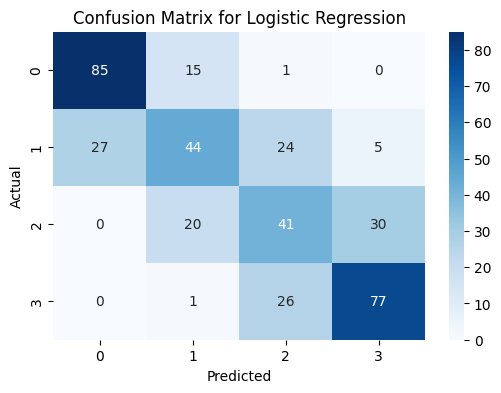

Model: KNN
Accuracy: 0.9570707070707071
F1-Score: 0.9572025485338228
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       101
           1       0.93      0.96      0.95       100
           2       0.93      0.95      0.94        91
           3       0.98      0.96      0.97       104

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396

Confusion Matrix:
[[ 97   4   0   0]
 [  2  96   2   0]
 [  0   3  86   2]
 [  0   0   4 100]]



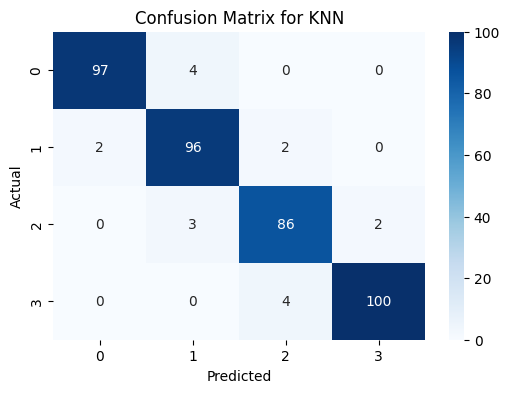

Model: Naive Bayes
Accuracy: 0.8005050505050505
F1-Score: 0.7997533507581516
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       101
           1       0.76      0.69      0.72       100
           2       0.67      0.70      0.68        91
           3       0.88      0.87      0.87       104

    accuracy                           0.80       396
   macro avg       0.80      0.80      0.80       396
weighted avg       0.80      0.80      0.80       396

Confusion Matrix:
[[94  7  0  0]
 [13 69 18  0]
 [ 0 15 64 12]
 [ 0  0 14 90]]



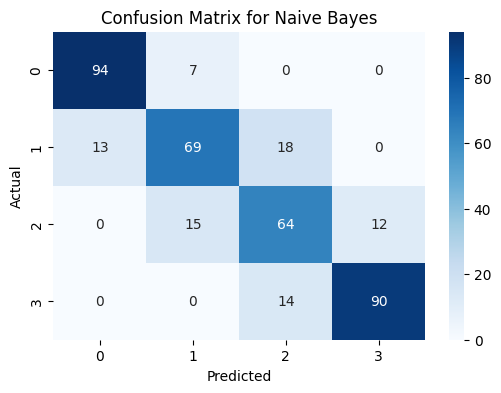

Model: SVM
Accuracy: 0.9646464646464646
F1-Score: 0.9645821465514786
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       101
           1       0.95      0.97      0.96       100
           2       0.96      0.93      0.94        91
           3       0.98      0.96      0.97       104

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396

Confusion Matrix:
[[100   1   0   0]
 [  3  97   0   0]
 [  0   4  85   2]
 [  0   0   4 100]]



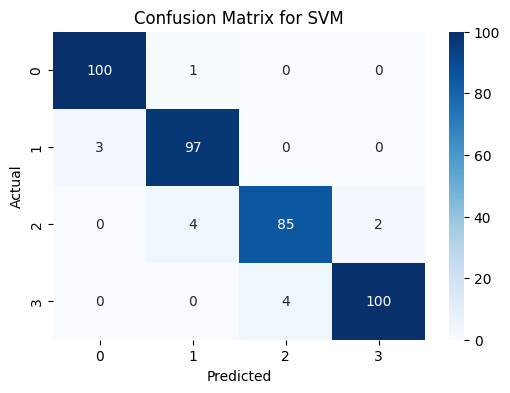

Model: Decision Tree
Accuracy: 1.0
F1-Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[101   0   0   0]
 [  0 100   0   0]
 [  0   0  91   0]
 [  0   0   0 104]]



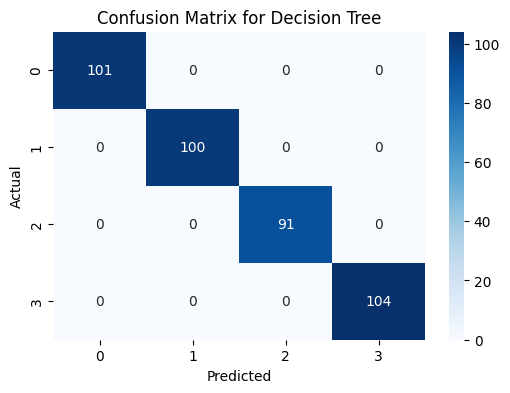

Model: Random Forest
Accuracy: 1.0
F1-Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[101   0   0   0]
 [  0 100   0   0]
 [  0   0  91   0]
 [  0   0   0 104]]



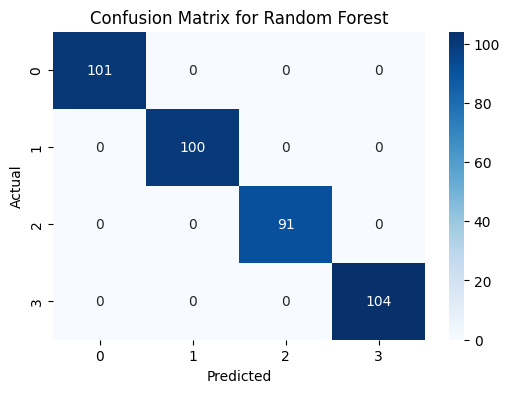

Model: Extra Trees
Accuracy: 1.0
F1-Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[101   0   0   0]
 [  0 100   0   0]
 [  0   0  91   0]
 [  0   0   0 104]]



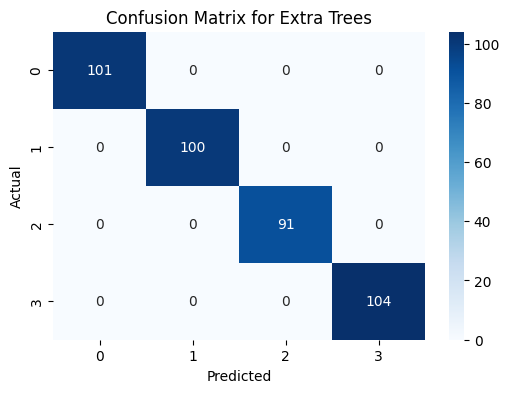

Model: XGBoost
Accuracy: 1.0
F1-Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       104

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

Confusion Matrix:
[[101   0   0   0]
 [  0 100   0   0]
 [  0   0  91   0]
 [  0   0   0 104]]



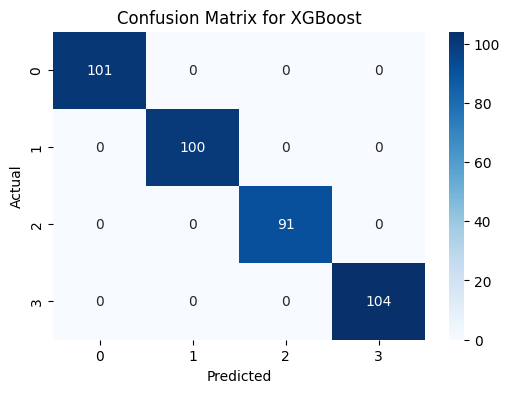

Best Model: Decision Tree with F1-Score: 1.0


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier()
}
# Call the function to compare models and select the best one
best_model = compare_models(models, X_train, Y_train, X_val, Y_val)

After a comprehensive evaluation of various models, we have selected the Decision Tree as the most effective model for our classification task.

Savig ML model in Pickle

In [144]:
import pickle

In [145]:
# Saving the model as pickle
pickle.dump(model_four,open('phone_classification.pkl','wb'))

In [146]:
# Load saved pickled model
pickle_model = pickle.load(open('phone_classification.pkl','rb'))

In [147]:
# Predict on the validation set
pickle_model.predict(X_test)

array([0, 0, 3, 0, 3, 2, 2, 0, 1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 3, 0, 0, 0, 3, 3, 0, 2, 1, 3, 0, 2, 3, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 1, 3, 2, 0, 3, 0, 2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 3, 0, 2, 0, 2, 1, 0, 3, 2, 0, 0, 0, 3, 0, 2, 3, 2, 1, 0, 2, 1,
       3, 1, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 1, 1, 2, 3,
       1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 2, 3, 0, 2, 1, 1, 3, 1, 3, 0, 1, 2,
       3, 3, 0, 0, 3, 3, 3, 3, 0, 2, 2, 0, 0, 2, 3, 3, 1, 1, 2, 0, 0, 0,
       3, 1, 3, 3, 1, 3, 1, 0, 3, 0, 3, 2, 2, 2, 2, 2, 3, 3, 1, 0, 0, 2,
       0, 3, 2, 2, 1, 3, 1, 2, 2, 0, 0, 1, 3, 2, 3, 2, 0, 2, 0, 3, 3, 1,
       0, 3, 1, 0, 3, 3, 2, 0, 2, 3, 0, 1, 1, 2, 0, 2, 1, 3, 0, 0, 0, 1,
       0, 3, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 3, 3, 2, 2, 2, 3, 0, 3, 0,
       2, 2, 2, 3, 1, 2, 1, 2, 3, 2, 0, 2, 3, 1, 2, 0, 0, 3, 2, 2, 3, 1,
       3, 3, 1, 1, 1, 0, 1, 3, 0, 1, 2, 3, 0, 1, 2,

In [148]:
# Check the accuracy
y_pred_pickle = pickle_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_pickle)
print(accuracy)

0.9949494949494949


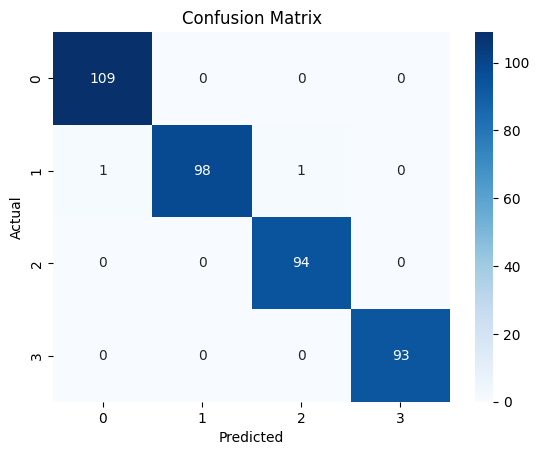

In [149]:
# Confusion metrix
sns.heatmap(confusion_matrix(Y_test,y_pred_pickle), annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [150]:
# Classification repor
print(classification_report(Y_test,y_pred_pickle))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.98      0.99       100
           2       0.99      1.00      0.99        94
           3       1.00      1.00      1.00        93

    accuracy                           0.99       396
   macro avg       1.00      0.99      1.00       396
weighted avg       0.99      0.99      0.99       396

